In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install the Necessary libraries

In [2]:
!pip install torch torchvision torchaudio transformers Pillow hf_xet faiss-cpu -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 69.5 MB/s eta 0:00:00


In [ ]:
# !unzip -q /content/drive/MyDrive/data/data.zip -d /content/drive/MyDrive/data

NOTE: (Regarding the dataset used)
- A 'sample' is one audio, image and a text file combined
- Each class has 5 samples
- There are 50 classes

So, there are 3 folders.. audio, images and text.. inside each folder there are 50 folders (names of classes), inside each class folder, there are 5 files

For eg: In audio, image and texts folders, there is a folder called "airplane". Inside each of them there is one file:
> - Images/airplane/airplane-1.png  # photo of airplane
> - Audio/airplane/airplane-1.wav  # sound of airplane flying
> - Text/airplane/airplane-1.txt  # description of how airplane in that image (airplane-1.png ) looks

In [3]:
import os

In [4]:
AUDIO_DIR = "/content/drive/MyDrive/data/data/audio"
IMAGE_DIR = "/content/drive/MyDrive/data/data/images"
TEXT_DIR = "/content/drive/MyDrive/data/data/text"
CLASSES = [d for d in os.listdir(IMAGE_DIR) if os.path.isdir(os.path.join(IMAGE_DIR, d))]
NUM_CLASSES = len(CLASSES)
CLASS_TO_IDS = {cls_name: i for i, cls_name in enumerate(CLASSES)}

### Download the tokenizers

In [5]:
TEXT_MODEL_NAME = "bert-base-uncased"
IMAGE_MODEL_NAME = "openai/clip-vit-large-patch14"
AUDIO_MODEL_NAME = "laion/larger_clap_general"

MODEL_SAVE_PATH = "/content/drive/MyDrive/data/data/model.pth"

In [6]:
from transformers import BertTokenizer
text_tokenizer = BertTokenizer.from_pretrained(TEXT_MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [7]:
from transformers import CLIPProcessor
image_tokenizer = CLIPProcessor.from_pretrained(IMAGE_MODEL_NAME)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [8]:
from transformers import ClapProcessor
audio_tokenizer = ClapProcessor.from_pretrained(AUDIO_MODEL_NAME)

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

### Store the paths for all data

In [9]:
file_paths = {}

In [10]:
BASE_DIR = "/content/drive/MyDrive/data/data"
for modality in os.listdir(BASE_DIR):
    file_paths[modality] = {}
    if os.path.isdir(os.path.join(BASE_DIR, modality)):
        for label in os.listdir(os.path.join(BASE_DIR, modality)):
            file_paths[modality][label] = []
            for file in os.listdir(os.path.join(BASE_DIR, modality, label)):
                file_paths[modality][label].append(os.path.join(BASE_DIR, modality, label, file))

### Create samples (by combining identical names across different folders (img, audio, text))

In [11]:
training_samples = []
for class_name in CLASSES:
    images = file_paths["images"].get(class_name, [])
    texts = file_paths["text"].get(class_name, [])
    audios = file_paths["audio"].get(class_name, [])

    img_basenames = {os.path.basename(f).split(".")[0]: f for f in images}
    txt_basenames = {os.path.basename(f).split(".")[0]: f for f in texts}
    aud_basenames = {os.path.basename(f).split(".")[0]: f for f in audios}

    file_names = set(img_basenames.keys()) & set(txt_basenames.keys()) & set(aud_basenames.keys())

    for file in file_names:
        training_samples.append(
            {
                "image_path": img_basenames[file],
                "audio_path": aud_basenames[file],
                "text_path": txt_basenames[file],
                "class_name": class_name,
                "class_id": CLASS_TO_IDS[class_name]
            }
    )

print(f"{len(training_samples)} samples ready for training")

250 samples ready for training


### Check token count so all 3 contribute equally to the training process

In [12]:
sample_1 = training_samples[0]
print(sample_1)

{'image_path': '/content/drive/MyDrive/data/data/images/engine/engine_5.png', 'audio_path': '/content/drive/MyDrive/data/data/audio/engine/engine_5.wav', 'text_path': '/content/drive/MyDrive/data/data/text/engine/engine_5.png.txt', 'class_name': 'engine', 'class_id': 0}


In [ ]:
with open(sample_1["text_path"], "r") as fin:
    sample_text = fin.read().strip()

tokens = text_tokenizer(sample_text, return_tensors='pt')
print("Text token count:", tokens['input_ids'].shape[-1])

Text token count: 123


In [ ]:
from PIL import Image
sample_image = Image.open(sample_1["image_path"]).convert("RGB")

inputs = image_tokenizer(images=sample_image, return_tensors="pt")
pixel_values = inputs["pixel_values"]
_, _, h, w = pixel_values.shape
patch_size = 16

num_patches = (h // patch_size) * (w // patch_size)
token_count = 1 + num_patches
print("Image token count:", token_count)

Image token count: 197


In [ ]:
pixel_values.shape

torch.Size([1, 3, 224, 224])

In [ ]:
import torchaudio

waveform, sr = torchaudio.load(sample_1["audio_path"])
waveform = waveform.mean(0, keepdim=True)

if sr != 48000:
    resampler = torchaudio.transforms.Resample(sr, 48000)
    waveform = resampler(waveform)

inputs = audio_tokenizer(audios=waveform.squeeze(0).numpy(), return_tensors="pt", sampling_rate=48000)

audio_input = inputs["input_features"]
print("Audio token count:", audio_input.shape[2])


Audio token count: 1001


In [ ]:
inputs["input_features"].squeeze().shape

torch.Size([1001, 64])

In [ ]:
import torch
pooled = torch.nn.functional.adaptive_avg_pool2d(audio_input, (150, 64))

In [ ]:
pooled.shape[2]

150

### Create Dataset

In [13]:
import torch
import torchaudio
from torch.utils.data import Dataset
from PIL import Image

class MultimodalDataset(Dataset):
    def __init__(self, samples, text_tokenizer, image_processor, audio_processor, return_metadata=False):
        self.samples = samples
        self.text_tokenizer = text_tokenizer
        self.image_processor = image_processor
        self.audio_processor = audio_processor
        self.return_metadata = return_metadata
        self.sample_rate = 48000

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, id):
        sample = self.samples[id]

        try:
            image = Image.open(sample["image_path"]).convert("RGB")
            image_inputs = self.image_processor(images=image, return_tensors="pt")["pixel_values"].squeeze(0)

        except Exception as e:
            print(f"Error loading image {sample['image_path']}: {e}")
            image_inputs = torch.zeros((3, 224, 224))


        try:
            waveform, sr = torchaudio.load(sample["audio_path"])

            if sr != self.sample_rate:
                resampler = torchaudio.transforms.Resample(sr, self.sample_rate)
                waveform = resampler(waveform)

            waveform = torch.mean(waveform, dim=0, keepdim=True)

            audio_inputs = audio_tokenizer(audios=waveform.squeeze(0).numpy(), return_tensors="pt", sampling_rate=self.sample_rate)
            audio_inputs = torch.nn.functional.adaptive_avg_pool2d(audio_inputs["input_features"], (180, 64)).squeeze()

        except Exception as e:
            print(f"Error loading audio {sample['audio_path']}: {e}")
            audio_inputs = torch.zeros((180, 64))


        try:
            with open(sample["text_path"], "r", encoding="utf-8") as f:
                text = f.read().strip()

            text_inputs = self.text_tokenizer(text, padding="max_length", truncation=True, max_length=170, return_tensors="pt")
            text_inputs = {k: v.squeeze(0) for k, v in text_inputs.items()}

        except Exception as e:
            print(f"Error loading text {sample['text_path']}: {e}")

            text_inputs = {
                "input_ids": torch.zeros(170, dtype=torch.long),
                "attention_mask": torch.zeros(170, dtype=torch.long)
             }

            if "token_type_ids" in self.text_tokenizer.model_input_names:
                text_inputs["token_type_ids"] = torch.zeros(170, dtype=torch.long)

        items = {
            "image_inputs": image_inputs,
            "audio_inputs": audio_inputs,
            "text_inputs": text_inputs,
            "class_id" : torch.tensor(sample["class_id"], dtype=torch.long)
        }

        if self.return_metadata:
            items["metadata"] = {
            "text_path": sample.get("text_path"),
            "image_path": sample.get("image_path"),
            "audio_path": sample.get("audio_path"),
            "class_name": sample.get("class_name")
        }

        return items


In [14]:
train_dataset = MultimodalDataset(
    training_samples,
    text_tokenizer,
    image_tokenizer,
    audio_tokenizer
)

In [15]:
import multiprocessing
multiprocessing.cpu_count()

2

### Create Batch loader

In [22]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [ ]:
data_iter = iter(train_dataloader)
batch = next(data_iter)

In [ ]:
batch.keys()

dict_keys(['image_inputs', 'audio_inputs', 'text_inputs', 'class_id'])

### Examine the output dimensions of each model

In [16]:
from transformers import BertModel, CLIPModel, ClapModel

In [ ]:
text_model = BertModel.from_pretrained(TEXT_MODEL_NAME)

In [ ]:
batch["text_inputs"]

{'input_ids': tensor([[  101,  2023,  2003,  ...,     0,     0,     0],
         [  101,  2023,  3065,  ...,     0,     0,     0],
         [  101,  2023,  2003,  ...,     0,     0,     0],
         ...,
         [  101,  2023,  3024,  ...,     0,     0,     0],
         [  101,  2023, 19566,  ...,     0,     0,     0],
         [  101,  2023, 19566,  ...,   102,     0,     0]]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 1, 0, 0]])}

In [ ]:
batch["text_inputs"]["input_ids"].shape

torch.Size([8, 170])

In [ ]:
batch["text_inputs"]["token_type_ids"].shape

torch.Size([8, 170])

In [ ]:
batch["text_inputs"]["attention_mask"].shape

torch.Size([8, 170])

In [ ]:
text_outputs = text_model(**batch["text_inputs"])

In [ ]:
text_outputs.__dict__.keys()

dict_keys(['last_hidden_state', 'pooler_output', 'hidden_states', 'past_key_values', 'attentions', 'cross_attentions'])

In [ ]:
vision_model = CLIPModel.from_pretrained(IMAGE_MODEL_NAME)

In [ ]:
batch["image_inputs"].shape

torch.Size([8, 3, 224, 224])

In [ ]:
image_outputs = vision_model.get_image_features(pixel_values=batch["image_inputs"])

In [ ]:
image_outputs.shape

torch.Size([8, 768])

In [ ]:
audio_model = ClapModel.from_pretrained(AUDIO_MODEL_NAME)

In [ ]:
batch["audio_inputs"].shape

torch.Size([8, 180, 64])

In [ ]:
audio_outputs = audio_model.get_audio_features(input_features=batch["audio_inputs"].unsqueeze(1))

In [ ]:
audio_outputs.shape

torch.Size([8, 512])

### Create the combined modal

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultimodalModel(nn.Module):
    def __init__(self, text_model_name, image_model_name, audio_model_name, embedding_dim=256):
        super().__init__()
        self.text_model = BertModel.from_pretrained(text_model_name)
        self.image_model = CLIPModel.from_pretrained(image_model_name)
        self.audio_model = ClapModel.from_pretrained(audio_model_name)

        self.text_feat_dim = 768
        self.image_feat_dim = 768
        self.audio_feat_dim = 512

        self.text_projection = nn.Linear(self.text_feat_dim, embedding_dim)
        self.image_projection = nn.Linear(self.image_feat_dim, embedding_dim)
        self.audio_projection = nn.Linear(self.audio_feat_dim, embedding_dim)

        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))

    def encode_text(self, inputs):
        outputs = self.text_model(**inputs)
        pooled_output = outputs.pooler_output if hasattr(outputs, 'pooler_output') else outputs.last_hidden_state.mean(dim=1)
        embedding = self.text_projection(pooled_output)
        assert embedding.shape[1] == self.text_projection.out_features
        return F.normalize(embedding, p=2, dim=1)

    def encode_image(self, inputs):
        outputs = self.image_model.get_image_features(pixel_values=inputs)
        embedding = self.image_projection(outputs)
        assert embedding.shape[1] == self.image_projection.out_features
        return F.normalize(embedding, p=2, dim=1)

    def encode_audio(self, inputs):
        outputs = self.audio_model.get_audio_features(input_features=inputs.unsqueeze(1))
        embedding = self.audio_projection(outputs)
        assert embedding.shape[1] == self.audio_projection.out_features
        return F.normalize(embedding, p=2, dim=1)

    def forward(self, text_inputs, image_inputs, audio_inputs):
        text_embeds = self.encode_text(text_inputs)
        image_embeds = self.encode_image(image_inputs)
        audio_embeds = self.encode_audio(audio_inputs)
        return text_embeds, image_embeds, audio_embeds

In [18]:
def contrastive_loss(logits: torch.Tensor) -> torch.Tensor:
    labels = torch.arange(len(logits), device=logits.device)
    return F.cross_entropy(logits, labels) + F.cross_entropy(logits.t(), labels)

def calculate_loss(text_embeds, image_embeds, audio_embeds, logit_scale):
    logit_scale = logit_scale.exp()

    logits_it = logit_scale * image_embeds @ text_embeds.t()
    loss_it = 0.3 * contrastive_loss(logits_it)

    logits_ia = logit_scale * image_embeds @ audio_embeds.t()
    loss_ia = 0.3 * contrastive_loss(logits_ia)

    logits_ta = logit_scale * text_embeds @ audio_embeds.t()
    loss_ta = 0.3 * contrastive_loss(logits_ta)

    shared_mean = (text_embeds + image_embeds + audio_embeds) / 3
    loss_center_text = F.mse_loss(text_embeds, shared_mean)
    loss_center_image = F.mse_loss(image_embeds, shared_mean)
    loss_center_audio = F.mse_loss(audio_embeds, shared_mean)

    loss_center = 0.1 * (loss_center_text + loss_center_image + loss_center_audio)
    total_loss = loss_it + loss_ia + loss_ta + loss_center

    print(f"Losses: [Img-Txt] {loss_it.item():.4f} [Img-Aud] {loss_ia.item():.4f} [Txt-Aud] {loss_ta.item():.4f} [Center] {loss_center.item():.4f} [Total] {total_loss.item():.4f}")
    return total_loss


In [19]:
import torch.optim as optim
from tqdm.auto import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [20]:
model = MultimodalModel(
    TEXT_MODEL_NAME,
    IMAGE_MODEL_NAME,
    AUDIO_MODEL_NAME,
    embedding_dim=256
).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/643 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/776M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/776M [00:00<?, ?B/s]

In [23]:
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
num_epochs = 20


model.train()
for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch in progress_bar:
        optimizer.zero_grad()

        image_inputs = batch["image_inputs"].to(device)
        audio_inputs = batch["audio_inputs"].to(device)
        text_inputs = {k: v.to(device) for k, v in batch["text_inputs"].items()}

        text_embeds, image_embeds, audio_embeds = model(text_inputs, image_inputs, audio_inputs)

        loss = calculate_loss(text_embeds, image_embeds, audio_embeds, model.logit_scale)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({"loss": loss.item()})

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1} Average Loss: {avg_loss:.4f}")

Epoch 1/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 1.2668 [Img-Aud] 1.4265 [Txt-Aud] 1.2610 [Center] 0.0008 [Total] 3.9551
Losses: [Img-Txt] 1.2449 [Img-Aud] 1.4001 [Txt-Aud] 1.2637 [Center] 0.0008 [Total] 3.9095
Losses: [Img-Txt] 1.2977 [Img-Aud] 1.3748 [Txt-Aud] 1.2472 [Center] 0.0008 [Total] 3.9206
Losses: [Img-Txt] 1.3088 [Img-Aud] 1.3019 [Txt-Aud] 1.2505 [Center] 0.0008 [Total] 3.8620
Losses: [Img-Txt] 1.2798 [Img-Aud] 1.3302 [Txt-Aud] 1.2670 [Center] 0.0008 [Total] 3.8778
Losses: [Img-Txt] 1.2370 [Img-Aud] 1.3385 [Txt-Aud] 1.2536 [Center] 0.0008 [Total] 3.8299
Losses: [Img-Txt] 1.2604 [Img-Aud] 1.2763 [Txt-Aud] 1.2481 [Center] 0.0008 [Total] 3.7856
Losses: [Img-Txt] 1.2836 [Img-Aud] 1.2564 [Txt-Aud] 1.2487 [Center] 0.0008 [Total] 3.7895
Losses: [Img-Txt] 1.2520 [Img-Aud] 1.1914 [Txt-Aud] 1.2542 [Center] 0.0008 [Total] 3.6983
Losses: [Img-Txt] 1.2545 [Img-Aud] 1.2718 [Txt-Aud] 1.2762 [Center] 0.0008 [Total] 3.8033
Losses: [Img-Txt] 1.2402 [Img-Aud] 1.2395 [Txt-Aud] 1.2339 [Center] 0.0008 [Total] 3.7144
Losses: [I

Epoch 2/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.9601 [Img-Aud] 0.8829 [Txt-Aud] 1.1482 [Center] 0.0007 [Total] 2.9920
Losses: [Img-Txt] 0.8828 [Img-Aud] 0.8607 [Txt-Aud] 1.1306 [Center] 0.0007 [Total] 2.8748
Losses: [Img-Txt] 1.1007 [Img-Aud] 0.9715 [Txt-Aud] 1.1844 [Center] 0.0008 [Total] 3.2573
Losses: [Img-Txt] 1.0590 [Img-Aud] 0.9395 [Txt-Aud] 1.2064 [Center] 0.0007 [Total] 3.2056
Losses: [Img-Txt] 1.1141 [Img-Aud] 0.8594 [Txt-Aud] 1.1901 [Center] 0.0007 [Total] 3.1643
Losses: [Img-Txt] 1.1112 [Img-Aud] 0.7097 [Txt-Aud] 1.1916 [Center] 0.0007 [Total] 3.0133
Losses: [Img-Txt] 1.0780 [Img-Aud] 0.8181 [Txt-Aud] 1.1689 [Center] 0.0007 [Total] 3.0657
Losses: [Img-Txt] 0.9655 [Img-Aud] 0.7253 [Txt-Aud] 1.1446 [Center] 0.0007 [Total] 2.8361
Losses: [Img-Txt] 1.0013 [Img-Aud] 0.6432 [Txt-Aud] 1.1433 [Center] 0.0007 [Total] 2.7885
Losses: [Img-Txt] 1.0959 [Img-Aud] 0.8965 [Txt-Aud] 1.1590 [Center] 0.0007 [Total] 3.1522
Losses: [Img-Txt] 0.8512 [Img-Aud] 0.7076 [Txt-Aud] 1.2232 [Center] 0.0007 [Total] 2.7827
Losses: [I

Epoch 3/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.4727 [Img-Aud] 0.4504 [Txt-Aud] 0.9368 [Center] 0.0006 [Total] 1.8606
Losses: [Img-Txt] 0.6295 [Img-Aud] 0.4966 [Txt-Aud] 0.8401 [Center] 0.0006 [Total] 1.9668
Losses: [Img-Txt] 0.6978 [Img-Aud] 0.3839 [Txt-Aud] 0.8722 [Center] 0.0007 [Total] 1.9546
Losses: [Img-Txt] 0.7762 [Img-Aud] 0.6532 [Txt-Aud] 1.0690 [Center] 0.0006 [Total] 2.4991
Losses: [Img-Txt] 0.7773 [Img-Aud] 0.6677 [Txt-Aud] 1.0574 [Center] 0.0006 [Total] 2.5029
Losses: [Img-Txt] 0.6658 [Img-Aud] 0.4190 [Txt-Aud] 0.8616 [Center] 0.0006 [Total] 1.9470
Losses: [Img-Txt] 0.5417 [Img-Aud] 0.3442 [Txt-Aud] 0.9128 [Center] 0.0006 [Total] 1.7993
Losses: [Img-Txt] 0.5672 [Img-Aud] 0.5207 [Txt-Aud] 1.0743 [Center] 0.0006 [Total] 2.1629
Losses: [Img-Txt] 0.5951 [Img-Aud] 0.5124 [Txt-Aud] 0.6794 [Center] 0.0006 [Total] 1.7876
Losses: [Img-Txt] 0.6581 [Img-Aud] 0.3386 [Txt-Aud] 0.8577 [Center] 0.0006 [Total] 1.8550
Losses: [Img-Txt] 0.4543 [Img-Aud] 0.4074 [Txt-Aud] 0.8130 [Center] 0.0006 [Total] 1.6753
Losses: [I

Epoch 4/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.5520 [Img-Aud] 0.4004 [Txt-Aud] 0.9725 [Center] 0.0006 [Total] 1.9255
Losses: [Img-Txt] 0.3196 [Img-Aud] 0.3399 [Txt-Aud] 0.8720 [Center] 0.0006 [Total] 1.5321
Losses: [Img-Txt] 0.4474 [Img-Aud] 0.4030 [Txt-Aud] 0.8587 [Center] 0.0006 [Total] 1.7096
Losses: [Img-Txt] 0.3480 [Img-Aud] 0.1824 [Txt-Aud] 0.7092 [Center] 0.0006 [Total] 1.2402
Losses: [Img-Txt] 0.4112 [Img-Aud] 0.3034 [Txt-Aud] 0.5754 [Center] 0.0006 [Total] 1.2906
Losses: [Img-Txt] 0.2535 [Img-Aud] 0.2730 [Txt-Aud] 0.6301 [Center] 0.0006 [Total] 1.1572
Losses: [Img-Txt] 0.2914 [Img-Aud] 0.1840 [Txt-Aud] 0.7697 [Center] 0.0006 [Total] 1.2457
Losses: [Img-Txt] 0.4097 [Img-Aud] 0.5358 [Txt-Aud] 0.7566 [Center] 0.0006 [Total] 1.7027
Losses: [Img-Txt] 0.4272 [Img-Aud] 0.2638 [Txt-Aud] 0.7964 [Center] 0.0006 [Total] 1.4880
Losses: [Img-Txt] 0.4391 [Img-Aud] 0.2578 [Txt-Aud] 0.7638 [Center] 0.0006 [Total] 1.4613
Losses: [Img-Txt] 0.4840 [Img-Aud] 0.5381 [Txt-Aud] 0.9096 [Center] 0.0006 [Total] 1.9323
Losses: [I

Epoch 5/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1886 [Img-Aud] 0.1499 [Txt-Aud] 0.5252 [Center] 0.0005 [Total] 0.8642
Losses: [Img-Txt] 0.2302 [Img-Aud] 0.4302 [Txt-Aud] 0.6665 [Center] 0.0006 [Total] 1.3275
Losses: [Img-Txt] 0.2459 [Img-Aud] 0.1067 [Txt-Aud] 0.5342 [Center] 0.0005 [Total] 0.8873
Losses: [Img-Txt] 0.3551 [Img-Aud] 0.2611 [Txt-Aud] 0.4633 [Center] 0.0005 [Total] 1.0801
Losses: [Img-Txt] 0.4187 [Img-Aud] 0.5366 [Txt-Aud] 0.7471 [Center] 0.0005 [Total] 1.7029
Losses: [Img-Txt] 0.2916 [Img-Aud] 0.2634 [Txt-Aud] 0.6726 [Center] 0.0005 [Total] 1.2282
Losses: [Img-Txt] 0.3797 [Img-Aud] 0.3031 [Txt-Aud] 0.6021 [Center] 0.0006 [Total] 1.2854
Losses: [Img-Txt] 0.3968 [Img-Aud] 0.4209 [Txt-Aud] 0.7773 [Center] 0.0005 [Total] 1.5955
Losses: [Img-Txt] 0.3559 [Img-Aud] 0.2256 [Txt-Aud] 0.6719 [Center] 0.0005 [Total] 1.2540
Losses: [Img-Txt] 0.1816 [Img-Aud] 0.2719 [Txt-Aud] 0.7032 [Center] 0.0005 [Total] 1.1573
Losses: [Img-Txt] 0.1896 [Img-Aud] 0.1454 [Txt-Aud] 0.4311 [Center] 0.0005 [Total] 0.7666
Losses: [I

Epoch 6/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.2707 [Img-Aud] 0.3534 [Txt-Aud] 0.7714 [Center] 0.0005 [Total] 1.3960
Losses: [Img-Txt] 0.2645 [Img-Aud] 0.2915 [Txt-Aud] 0.5921 [Center] 0.0005 [Total] 1.1486
Losses: [Img-Txt] 0.2171 [Img-Aud] 0.2287 [Txt-Aud] 0.6310 [Center] 0.0005 [Total] 1.0773
Losses: [Img-Txt] 0.2906 [Img-Aud] 0.1426 [Txt-Aud] 0.4486 [Center] 0.0005 [Total] 0.8823
Losses: [Img-Txt] 0.1169 [Img-Aud] 0.1119 [Txt-Aud] 0.3653 [Center] 0.0005 [Total] 0.5946
Losses: [Img-Txt] 0.1641 [Img-Aud] 0.2111 [Txt-Aud] 0.5801 [Center] 0.0005 [Total] 0.9557
Losses: [Img-Txt] 0.2212 [Img-Aud] 0.2108 [Txt-Aud] 0.5469 [Center] 0.0005 [Total] 0.9795
Losses: [Img-Txt] 0.2568 [Img-Aud] 0.2440 [Txt-Aud] 0.6317 [Center] 0.0005 [Total] 1.1330
Losses: [Img-Txt] 0.3764 [Img-Aud] 0.2582 [Txt-Aud] 0.6228 [Center] 0.0005 [Total] 1.2579
Losses: [Img-Txt] 0.1767 [Img-Aud] 0.1699 [Txt-Aud] 0.4381 [Center] 0.0005 [Total] 0.7852
Losses: [Img-Txt] 0.1546 [Img-Aud] 0.0446 [Txt-Aud] 0.3919 [Center] 0.0005 [Total] 0.5917
Losses: [I

Epoch 7/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1831 [Img-Aud] 0.1487 [Txt-Aud] 0.4623 [Center] 0.0005 [Total] 0.7946
Losses: [Img-Txt] 0.2309 [Img-Aud] 0.2653 [Txt-Aud] 0.6108 [Center] 0.0005 [Total] 1.1075
Losses: [Img-Txt] 0.1720 [Img-Aud] 0.1343 [Txt-Aud] 0.3959 [Center] 0.0005 [Total] 0.7027
Losses: [Img-Txt] 0.2088 [Img-Aud] 0.3441 [Txt-Aud] 0.4271 [Center] 0.0005 [Total] 0.9805
Losses: [Img-Txt] 0.1997 [Img-Aud] 0.1774 [Txt-Aud] 0.5413 [Center] 0.0005 [Total] 0.9189
Losses: [Img-Txt] 0.2323 [Img-Aud] 0.0988 [Txt-Aud] 0.5817 [Center] 0.0005 [Total] 0.9133
Losses: [Img-Txt] 0.2455 [Img-Aud] 0.2303 [Txt-Aud] 0.4189 [Center] 0.0005 [Total] 0.8952
Losses: [Img-Txt] 0.3708 [Img-Aud] 0.4171 [Txt-Aud] 0.7722 [Center] 0.0005 [Total] 1.5607
Losses: [Img-Txt] 0.1019 [Img-Aud] 0.0839 [Txt-Aud] 0.3850 [Center] 0.0005 [Total] 0.5713
Losses: [Img-Txt] 0.0959 [Img-Aud] 0.0980 [Txt-Aud] 0.3037 [Center] 0.0005 [Total] 0.4981
Losses: [Img-Txt] 0.2232 [Img-Aud] 0.0927 [Txt-Aud] 0.4202 [Center] 0.0005 [Total] 0.7366
Losses: [I

Epoch 8/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1250 [Img-Aud] 0.0506 [Txt-Aud] 0.3506 [Center] 0.0005 [Total] 0.5267
Losses: [Img-Txt] 0.1589 [Img-Aud] 0.1958 [Txt-Aud] 0.3004 [Center] 0.0005 [Total] 0.6556
Losses: [Img-Txt] 0.1329 [Img-Aud] 0.1361 [Txt-Aud] 0.3157 [Center] 0.0005 [Total] 0.5852
Losses: [Img-Txt] 0.1463 [Img-Aud] 0.1587 [Txt-Aud] 0.3763 [Center] 0.0005 [Total] 0.6818
Losses: [Img-Txt] 0.1375 [Img-Aud] 0.3534 [Txt-Aud] 0.6357 [Center] 0.0005 [Total] 1.1271
Losses: [Img-Txt] 0.1018 [Img-Aud] 0.1127 [Txt-Aud] 0.3284 [Center] 0.0005 [Total] 0.5434
Losses: [Img-Txt] 0.0543 [Img-Aud] 0.0519 [Txt-Aud] 0.2730 [Center] 0.0005 [Total] 0.3796
Losses: [Img-Txt] 0.1371 [Img-Aud] 0.1966 [Txt-Aud] 0.5276 [Center] 0.0005 [Total] 0.8618
Losses: [Img-Txt] 0.1106 [Img-Aud] 0.0400 [Txt-Aud] 0.3105 [Center] 0.0005 [Total] 0.4614
Losses: [Img-Txt] 0.1149 [Img-Aud] 0.0786 [Txt-Aud] 0.4035 [Center] 0.0005 [Total] 0.5974
Losses: [Img-Txt] 0.0884 [Img-Aud] 0.0496 [Txt-Aud] 0.2779 [Center] 0.0005 [Total] 0.4164
Losses: [I

Epoch 9/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.0316 [Img-Aud] 0.0347 [Txt-Aud] 0.3285 [Center] 0.0004 [Total] 0.3952
Losses: [Img-Txt] 0.1017 [Img-Aud] 0.0439 [Txt-Aud] 0.2036 [Center] 0.0004 [Total] 0.3497
Losses: [Img-Txt] 0.3010 [Img-Aud] 0.3067 [Txt-Aud] 0.4447 [Center] 0.0005 [Total] 1.0528
Losses: [Img-Txt] 0.0790 [Img-Aud] 0.1128 [Txt-Aud] 0.2616 [Center] 0.0004 [Total] 0.4539
Losses: [Img-Txt] 0.1070 [Img-Aud] 0.0480 [Txt-Aud] 0.3190 [Center] 0.0005 [Total] 0.4745
Losses: [Img-Txt] 0.0773 [Img-Aud] 0.0545 [Txt-Aud] 0.3381 [Center] 0.0004 [Total] 0.4703
Losses: [Img-Txt] 0.0526 [Img-Aud] 0.1833 [Txt-Aud] 0.4334 [Center] 0.0005 [Total] 0.6699
Losses: [Img-Txt] 0.1781 [Img-Aud] 0.1574 [Txt-Aud] 0.2962 [Center] 0.0004 [Total] 0.6321
Losses: [Img-Txt] 0.0737 [Img-Aud] 0.0673 [Txt-Aud] 0.3811 [Center] 0.0005 [Total] 0.5226
Losses: [Img-Txt] 0.2094 [Img-Aud] 0.1458 [Txt-Aud] 0.3487 [Center] 0.0004 [Total] 0.7043
Losses: [Img-Txt] 0.1305 [Img-Aud] 0.0414 [Txt-Aud] 0.3405 [Center] 0.0005 [Total] 0.5128
Losses: [I

Epoch 10/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1358 [Img-Aud] 0.1379 [Txt-Aud] 0.2856 [Center] 0.0004 [Total] 0.5597
Losses: [Img-Txt] 0.0252 [Img-Aud] 0.0340 [Txt-Aud] 0.2542 [Center] 0.0004 [Total] 0.3138
Losses: [Img-Txt] 0.0071 [Img-Aud] 0.0544 [Txt-Aud] 0.1812 [Center] 0.0004 [Total] 0.2432
Losses: [Img-Txt] 0.0224 [Img-Aud] 0.0355 [Txt-Aud] 0.1660 [Center] 0.0004 [Total] 0.2245
Losses: [Img-Txt] 0.0978 [Img-Aud] 0.1205 [Txt-Aud] 0.2506 [Center] 0.0004 [Total] 0.4694
Losses: [Img-Txt] 0.1686 [Img-Aud] 0.2004 [Txt-Aud] 0.3570 [Center] 0.0004 [Total] 0.7266
Losses: [Img-Txt] 0.1282 [Img-Aud] 0.0987 [Txt-Aud] 0.2828 [Center] 0.0004 [Total] 0.5101
Losses: [Img-Txt] 0.0769 [Img-Aud] 0.0557 [Txt-Aud] 0.3611 [Center] 0.0004 [Total] 0.4942
Losses: [Img-Txt] 0.1552 [Img-Aud] 0.1444 [Txt-Aud] 0.2752 [Center] 0.0004 [Total] 0.5752
Losses: [Img-Txt] 0.0762 [Img-Aud] 0.2831 [Txt-Aud] 0.2931 [Center] 0.0004 [Total] 0.6528
Losses: [Img-Txt] 0.2104 [Img-Aud] 0.2578 [Txt-Aud] 0.4263 [Center] 0.0004 [Total] 0.8950
Losses: [I

Epoch 11/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.0874 [Img-Aud] 0.0251 [Txt-Aud] 0.2563 [Center] 0.0004 [Total] 0.3693
Losses: [Img-Txt] 0.0608 [Img-Aud] 0.0167 [Txt-Aud] 0.1142 [Center] 0.0004 [Total] 0.1920
Losses: [Img-Txt] 0.1533 [Img-Aud] 0.1644 [Txt-Aud] 0.3419 [Center] 0.0004 [Total] 0.6600
Losses: [Img-Txt] 0.0205 [Img-Aud] 0.0332 [Txt-Aud] 0.1288 [Center] 0.0004 [Total] 0.1829
Losses: [Img-Txt] 0.1180 [Img-Aud] 0.0816 [Txt-Aud] 0.3037 [Center] 0.0004 [Total] 0.5037
Losses: [Img-Txt] 0.1084 [Img-Aud] 0.0707 [Txt-Aud] 0.1678 [Center] 0.0004 [Total] 0.3472
Losses: [Img-Txt] 0.2106 [Img-Aud] 0.1506 [Txt-Aud] 0.2612 [Center] 0.0004 [Total] 0.6228
Losses: [Img-Txt] 0.0735 [Img-Aud] 0.0331 [Txt-Aud] 0.2690 [Center] 0.0004 [Total] 0.3760
Losses: [Img-Txt] 0.1390 [Img-Aud] 0.0386 [Txt-Aud] 0.2017 [Center] 0.0004 [Total] 0.3797
Losses: [Img-Txt] 0.1457 [Img-Aud] 0.1670 [Txt-Aud] 0.3001 [Center] 0.0004 [Total] 0.6132
Losses: [Img-Txt] 0.0342 [Img-Aud] 0.0956 [Txt-Aud] 0.1546 [Center] 0.0004 [Total] 0.2848
Losses: [I

Epoch 12/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1392 [Img-Aud] 0.1236 [Txt-Aud] 0.2446 [Center] 0.0004 [Total] 0.5079
Losses: [Img-Txt] 0.0264 [Img-Aud] 0.0403 [Txt-Aud] 0.2199 [Center] 0.0004 [Total] 0.2870
Losses: [Img-Txt] 0.1208 [Img-Aud] 0.1048 [Txt-Aud] 0.2302 [Center] 0.0004 [Total] 0.4563
Losses: [Img-Txt] 0.2214 [Img-Aud] 0.1937 [Txt-Aud] 0.3505 [Center] 0.0004 [Total] 0.7661
Losses: [Img-Txt] 0.0252 [Img-Aud] 0.0354 [Txt-Aud] 0.2283 [Center] 0.0004 [Total] 0.2893
Losses: [Img-Txt] 0.0743 [Img-Aud] 0.0936 [Txt-Aud] 0.2440 [Center] 0.0004 [Total] 0.4123
Losses: [Img-Txt] 0.1651 [Img-Aud] 0.1136 [Txt-Aud] 0.2650 [Center] 0.0004 [Total] 0.5442
Losses: [Img-Txt] 0.1020 [Img-Aud] 0.0433 [Txt-Aud] 0.1243 [Center] 0.0004 [Total] 0.2700
Losses: [Img-Txt] 0.1084 [Img-Aud] 0.1579 [Txt-Aud] 0.1632 [Center] 0.0004 [Total] 0.4300
Losses: [Img-Txt] 0.0455 [Img-Aud] 0.0400 [Txt-Aud] 0.2382 [Center] 0.0004 [Total] 0.3240
Losses: [Img-Txt] 0.0152 [Img-Aud] 0.0635 [Txt-Aud] 0.2047 [Center] 0.0004 [Total] 0.2838
Losses: [I

Epoch 13/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1307 [Img-Aud] 0.1127 [Txt-Aud] 0.1906 [Center] 0.0004 [Total] 0.4345
Losses: [Img-Txt] 0.0497 [Img-Aud] 0.0434 [Txt-Aud] 0.1678 [Center] 0.0004 [Total] 0.2614
Losses: [Img-Txt] 0.1278 [Img-Aud] 0.2107 [Txt-Aud] 0.3806 [Center] 0.0004 [Total] 0.7195
Losses: [Img-Txt] 0.1591 [Img-Aud] 0.1571 [Txt-Aud] 0.3273 [Center] 0.0004 [Total] 0.6439
Losses: [Img-Txt] 0.0487 [Img-Aud] 0.1702 [Txt-Aud] 0.4168 [Center] 0.0004 [Total] 0.6362
Losses: [Img-Txt] 0.0851 [Img-Aud] 0.0295 [Txt-Aud] 0.1808 [Center] 0.0004 [Total] 0.2958
Losses: [Img-Txt] 0.1392 [Img-Aud] 0.1317 [Txt-Aud] 0.1924 [Center] 0.0004 [Total] 0.4637
Losses: [Img-Txt] 0.0157 [Img-Aud] 0.0642 [Txt-Aud] 0.1457 [Center] 0.0004 [Total] 0.2259
Losses: [Img-Txt] 0.0132 [Img-Aud] 0.0186 [Txt-Aud] 0.1113 [Center] 0.0004 [Total] 0.1436
Losses: [Img-Txt] 0.0307 [Img-Aud] 0.1375 [Txt-Aud] 0.3299 [Center] 0.0004 [Total] 0.4985
Losses: [Img-Txt] 0.0102 [Img-Aud] 0.0291 [Txt-Aud] 0.1262 [Center] 0.0004 [Total] 0.1659
Losses: [I

Epoch 14/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1363 [Img-Aud] 0.1102 [Txt-Aud] 0.2346 [Center] 0.0004 [Total] 0.4816
Losses: [Img-Txt] 0.0048 [Img-Aud] 0.0266 [Txt-Aud] 0.0799 [Center] 0.0004 [Total] 0.1117
Losses: [Img-Txt] 0.1150 [Img-Aud] 0.1199 [Txt-Aud] 0.1700 [Center] 0.0004 [Total] 0.4053
Losses: [Img-Txt] 0.2080 [Img-Aud] 0.1974 [Txt-Aud] 0.2999 [Center] 0.0004 [Total] 0.7057
Losses: [Img-Txt] 0.1203 [Img-Aud] 0.1499 [Txt-Aud] 0.2580 [Center] 0.0004 [Total] 0.5286
Losses: [Img-Txt] 0.2101 [Img-Aud] 0.2141 [Txt-Aud] 0.2657 [Center] 0.0004 [Total] 0.6904
Losses: [Img-Txt] 0.1471 [Img-Aud] 0.2056 [Txt-Aud] 0.2787 [Center] 0.0004 [Total] 0.6319
Losses: [Img-Txt] 0.1048 [Img-Aud] 0.1788 [Txt-Aud] 0.1720 [Center] 0.0004 [Total] 0.4560
Losses: [Img-Txt] 0.1609 [Img-Aud] 0.1918 [Txt-Aud] 0.4447 [Center] 0.0004 [Total] 0.7979
Losses: [Img-Txt] 0.1117 [Img-Aud] 0.2794 [Txt-Aud] 0.2964 [Center] 0.0004 [Total] 0.6879
Losses: [Img-Txt] 0.0212 [Img-Aud] 0.1589 [Txt-Aud] 0.2227 [Center] 0.0004 [Total] 0.4033
Losses: [I

Epoch 15/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.0127 [Img-Aud] 0.0195 [Txt-Aud] 0.1351 [Center] 0.0004 [Total] 0.1677
Losses: [Img-Txt] 0.0061 [Img-Aud] 0.0073 [Txt-Aud] 0.0645 [Center] 0.0004 [Total] 0.0782
Losses: [Img-Txt] 0.1377 [Img-Aud] 0.2107 [Txt-Aud] 0.3690 [Center] 0.0004 [Total] 0.7178
Losses: [Img-Txt] 0.0136 [Img-Aud] 0.0479 [Txt-Aud] 0.1884 [Center] 0.0004 [Total] 0.2502
Losses: [Img-Txt] 0.0491 [Img-Aud] 0.1177 [Txt-Aud] 0.3090 [Center] 0.0004 [Total] 0.4762
Losses: [Img-Txt] 0.3037 [Img-Aud] 0.3872 [Txt-Aud] 0.5365 [Center] 0.0004 [Total] 1.2279
Losses: [Img-Txt] 0.0300 [Img-Aud] 0.0370 [Txt-Aud] 0.1661 [Center] 0.0004 [Total] 0.2334
Losses: [Img-Txt] 0.0841 [Img-Aud] 0.1128 [Txt-Aud] 0.1779 [Center] 0.0004 [Total] 0.3751
Losses: [Img-Txt] 0.0154 [Img-Aud] 0.0227 [Txt-Aud] 0.2051 [Center] 0.0004 [Total] 0.2436
Losses: [Img-Txt] 0.0790 [Img-Aud] 0.0577 [Txt-Aud] 0.2446 [Center] 0.0004 [Total] 0.3818
Losses: [Img-Txt] 0.0420 [Img-Aud] 0.0727 [Txt-Aud] 0.1366 [Center] 0.0004 [Total] 0.2518
Losses: [I

Epoch 16/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.0316 [Img-Aud] 0.0430 [Txt-Aud] 0.1625 [Center] 0.0004 [Total] 0.2375
Losses: [Img-Txt] 0.0339 [Img-Aud] 0.0152 [Txt-Aud] 0.1177 [Center] 0.0004 [Total] 0.1673
Losses: [Img-Txt] 0.0197 [Img-Aud] 0.0128 [Txt-Aud] 0.0666 [Center] 0.0004 [Total] 0.0994
Losses: [Img-Txt] 0.0317 [Img-Aud] 0.0077 [Txt-Aud] 0.0791 [Center] 0.0004 [Total] 0.1189
Losses: [Img-Txt] 0.0966 [Img-Aud] 0.1348 [Txt-Aud] 0.1845 [Center] 0.0004 [Total] 0.4163
Losses: [Img-Txt] 0.0834 [Img-Aud] 0.1040 [Txt-Aud] 0.1357 [Center] 0.0004 [Total] 0.3235
Losses: [Img-Txt] 0.0859 [Img-Aud] 0.1095 [Txt-Aud] 0.1368 [Center] 0.0004 [Total] 0.3326
Losses: [Img-Txt] 0.0429 [Img-Aud] 0.1083 [Txt-Aud] 0.2435 [Center] 0.0004 [Total] 0.3951
Losses: [Img-Txt] 0.0207 [Img-Aud] 0.0606 [Txt-Aud] 0.1681 [Center] 0.0004 [Total] 0.2498
Losses: [Img-Txt] 0.0098 [Img-Aud] 0.0921 [Txt-Aud] 0.1519 [Center] 0.0004 [Total] 0.2541
Losses: [Img-Txt] 0.0095 [Img-Aud] 0.0436 [Txt-Aud] 0.1476 [Center] 0.0004 [Total] 0.2011
Losses: [I

Epoch 17/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.0092 [Img-Aud] 0.0345 [Txt-Aud] 0.1165 [Center] 0.0004 [Total] 0.1606
Losses: [Img-Txt] 0.0147 [Img-Aud] 0.0100 [Txt-Aud] 0.0740 [Center] 0.0004 [Total] 0.0991
Losses: [Img-Txt] 0.1327 [Img-Aud] 0.1004 [Txt-Aud] 0.1458 [Center] 0.0004 [Total] 0.3792
Losses: [Img-Txt] 0.0486 [Img-Aud] 0.0820 [Txt-Aud] 0.2087 [Center] 0.0004 [Total] 0.3397
Losses: [Img-Txt] 0.0949 [Img-Aud] 0.0977 [Txt-Aud] 0.1908 [Center] 0.0004 [Total] 0.3838
Losses: [Img-Txt] 0.1112 [Img-Aud] 0.0903 [Txt-Aud] 0.3466 [Center] 0.0004 [Total] 0.5485
Losses: [Img-Txt] 0.0083 [Img-Aud] 0.0089 [Txt-Aud] 0.0557 [Center] 0.0004 [Total] 0.0733
Losses: [Img-Txt] 0.0474 [Img-Aud] 0.0650 [Txt-Aud] 0.1600 [Center] 0.0004 [Total] 0.2727
Losses: [Img-Txt] 0.1348 [Img-Aud] 0.1383 [Txt-Aud] 0.3437 [Center] 0.0004 [Total] 0.6172
Losses: [Img-Txt] 0.0763 [Img-Aud] 0.0656 [Txt-Aud] 0.1872 [Center] 0.0004 [Total] 0.3295
Losses: [Img-Txt] 0.0259 [Img-Aud] 0.0725 [Txt-Aud] 0.1780 [Center] 0.0004 [Total] 0.2767
Losses: [I

Epoch 18/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1898 [Img-Aud] 0.0262 [Txt-Aud] 0.1863 [Center] 0.0004 [Total] 0.4027
Losses: [Img-Txt] 0.1942 [Img-Aud] 0.2105 [Txt-Aud] 0.2025 [Center] 0.0004 [Total] 0.6075
Losses: [Img-Txt] 0.0642 [Img-Aud] 0.0907 [Txt-Aud] 0.1759 [Center] 0.0004 [Total] 0.3312
Losses: [Img-Txt] 0.0985 [Img-Aud] 0.0599 [Txt-Aud] 0.1283 [Center] 0.0004 [Total] 0.2871
Losses: [Img-Txt] 0.0990 [Img-Aud] 0.0523 [Txt-Aud] 0.2190 [Center] 0.0004 [Total] 0.3706
Losses: [Img-Txt] 0.1563 [Img-Aud] 0.1324 [Txt-Aud] 0.1787 [Center] 0.0004 [Total] 0.4678
Losses: [Img-Txt] 0.0133 [Img-Aud] 0.0164 [Txt-Aud] 0.0936 [Center] 0.0004 [Total] 0.1236
Losses: [Img-Txt] 0.0473 [Img-Aud] 0.0944 [Txt-Aud] 0.1276 [Center] 0.0004 [Total] 0.2696
Losses: [Img-Txt] 0.0082 [Img-Aud] 0.0127 [Txt-Aud] 0.0783 [Center] 0.0004 [Total] 0.0996
Losses: [Img-Txt] 0.0082 [Img-Aud] 0.0071 [Txt-Aud] 0.0446 [Center] 0.0004 [Total] 0.0601
Losses: [Img-Txt] 0.0211 [Img-Aud] 0.0209 [Txt-Aud] 0.2183 [Center] 0.0004 [Total] 0.2606
Losses: [I

Epoch 19/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.1440 [Img-Aud] 0.1394 [Txt-Aud] 0.3008 [Center] 0.0004 [Total] 0.5845
Losses: [Img-Txt] 0.0051 [Img-Aud] 0.0153 [Txt-Aud] 0.0510 [Center] 0.0004 [Total] 0.0718
Losses: [Img-Txt] 0.0145 [Img-Aud] 0.0087 [Txt-Aud] 0.0552 [Center] 0.0004 [Total] 0.0788
Losses: [Img-Txt] 0.0326 [Img-Aud] 0.1334 [Txt-Aud] 0.1499 [Center] 0.0003 [Total] 0.3163
Losses: [Img-Txt] 0.0455 [Img-Aud] 0.0546 [Txt-Aud] 0.1140 [Center] 0.0004 [Total] 0.2145
Losses: [Img-Txt] 0.0088 [Img-Aud] 0.0073 [Txt-Aud] 0.0643 [Center] 0.0004 [Total] 0.0808
Losses: [Img-Txt] 0.0154 [Img-Aud] 0.0891 [Txt-Aud] 0.1227 [Center] 0.0004 [Total] 0.2275
Losses: [Img-Txt] 0.0272 [Img-Aud] 0.0318 [Txt-Aud] 0.1166 [Center] 0.0004 [Total] 0.1760
Losses: [Img-Txt] 0.1166 [Img-Aud] 0.1267 [Txt-Aud] 0.2515 [Center] 0.0004 [Total] 0.4951
Losses: [Img-Txt] 0.0511 [Img-Aud] 0.1363 [Txt-Aud] 0.1802 [Center] 0.0004 [Total] 0.3680
Losses: [Img-Txt] 0.0914 [Img-Aud] 0.0503 [Txt-Aud] 0.1438 [Center] 0.0004 [Total] 0.2858
Losses: [I

Epoch 20/20:   0%|          | 0/32 [00:00<?, ?it/s]

Losses: [Img-Txt] 0.0049 [Img-Aud] 0.0101 [Txt-Aud] 0.0611 [Center] 0.0003 [Total] 0.0765
Losses: [Img-Txt] 0.0189 [Img-Aud] 0.0404 [Txt-Aud] 0.1823 [Center] 0.0004 [Total] 0.2420
Losses: [Img-Txt] 0.0132 [Img-Aud] 0.0665 [Txt-Aud] 0.1884 [Center] 0.0004 [Total] 0.2685
Losses: [Img-Txt] 0.1084 [Img-Aud] 0.0515 [Txt-Aud] 0.1351 [Center] 0.0004 [Total] 0.2953
Losses: [Img-Txt] 0.0119 [Img-Aud] 0.0413 [Txt-Aud] 0.1309 [Center] 0.0004 [Total] 0.1844
Losses: [Img-Txt] 0.1192 [Img-Aud] 0.1060 [Txt-Aud] 0.1322 [Center] 0.0004 [Total] 0.3578
Losses: [Img-Txt] 0.0931 [Img-Aud] 0.1669 [Txt-Aud] 0.1687 [Center] 0.0004 [Total] 0.4291
Losses: [Img-Txt] 0.0133 [Img-Aud] 0.1379 [Txt-Aud] 0.2539 [Center] 0.0004 [Total] 0.4055
Losses: [Img-Txt] 0.1032 [Img-Aud] 0.0897 [Txt-Aud] 0.1654 [Center] 0.0003 [Total] 0.3587
Losses: [Img-Txt] 0.0043 [Img-Aud] 0.0185 [Txt-Aud] 0.1095 [Center] 0.0004 [Total] 0.1326
Losses: [Img-Txt] 0.0100 [Img-Aud] 0.0230 [Txt-Aud] 0.1295 [Center] 0.0004 [Total] 0.1629
Losses: [I

### Save the model

In [24]:
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")

Model saved to /content/drive/MyDrive/data/data/model.pth


### Create Embeddings and index data

In [25]:
EMBEDDING_DIM = 256

In [17]:
model = MultimodalModel(TEXT_MODEL_NAME, IMAGE_MODEL_NAME, AUDIO_MODEL_NAME, embedding_dim=EMBEDDING_DIM)
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/643 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/776M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/776M [00:00<?, ?B/s]

In [26]:
from torch.utils.data import DataLoader
inference_dataset = MultimodalDataset(training_samples, text_tokenizer, image_tokenizer, audio_tokenizer, return_metadata=True)
inference_loader = DataLoader(inference_dataset, batch_size=1)

In [27]:
model.eval()
all_embeddings = []
all_metadata = []
with torch.no_grad():
    for batch in tqdm(inference_loader):
        for k, v in batch.items():
            if isinstance(v, torch.Tensor):
                batch[k] = v.to(device)
            elif isinstance(v, dict):
                batch[k] = {kk: vv.to(device) if isinstance(vv, torch.Tensor) else vv for kk, vv in v.items()}
            else:
                batch[k] = v

        text_embeds, image_embeds, audio_embeds = model(
            batch["text_inputs"],
            batch["image_inputs"],
            batch["audio_inputs"]
        )
        all_embeddings.extend([
            text_embeds.flatten().cpu().numpy(),
            image_embeds.flatten().cpu().numpy(),
            audio_embeds.flatten().cpu().numpy()
        ])
        meta = batch["metadata"]
        all_metadata.extend([
            {"type": "text", "path": meta["text_path"], "class": meta["class_name"]},
            {"type": "image", "path": meta["image_path"], "class": meta["class_name"]},
            {"type": "audio", "path": meta["audio_path"], "class": meta["class_name"]}
        ])


  0%|          | 0/250 [00:00<?, ?it/s]

In [28]:
all_embeddings_np = np.array(all_embeddings).astype('float32')
print(f"Total embeddings created: {len(all_embeddings_np)}")

Total embeddings created: 750


### Create FAISS Index

In [29]:
import faiss
import pickle

index = faiss.IndexFlatL2(EMBEDDING_DIM)
all_embeddings = all_embeddings_np / np.linalg.norm(all_embeddings_np)
index.add(all_embeddings)

FAISS_INDEX_PATH = "/content/drive/MyDrive/data/data/unified_multimodal_indices.faiss"
METADATA_PATH = "/content/drive/MyDrive/data/data/metadata.pkl"


faiss.write_index(index, FAISS_INDEX_PATH)
with open(METADATA_PATH, 'wb') as f:
    pickle.dump(all_metadata, f)

print(f"Faiss index saved to {FAISS_INDEX_PATH}")
print(f"Metadata saved to {METADATA_PATH}")

Faiss index saved to /content/drive/MyDrive/data/data/unified_multimodal_indices.faiss
Metadata saved to /content/drive/MyDrive/data/data/metadata.pkl


In [75]:
index = faiss.read_index(FAISS_INDEX_PATH)
with open(METADATA_PATH, 'rb') as f:
    all_metadata = pickle.load(f)


model = MultimodalModel(TEXT_MODEL_NAME, IMAGE_MODEL_NAME, AUDIO_MODEL_NAME, embedding_dim=EMBEDDING_DIM);
model.load_state_dict(torch.load(MODEL_SAVE_PATH));
model.to(device);

In [30]:
len(all_metadata)

750

In [31]:
from collections import Counter
def retriever(query_text, k=5):
    """
    Retrieves top-k relevant items (image, audio, text) for a text query.
    """
    model.eval()
    with torch.no_grad():
        inputs = text_tokenizer(query_text, padding="max_length", truncation=True, max_length=170, return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}
        query_embedding = model.encode_text(inputs).cpu().numpy().astype(np.float32)

    distances, indices = index.search(query_embedding, k)

    results = []
    for i in range(k):
        idx = indices[0][i]
        dist = distances[0][i]
        meta = all_metadata[idx]
        results.append({
            "score": dist,
            "type": meta["type"],
            "path": meta["path"],
            "class": meta["class"],
            "class_index": idx
        })

    return results

In [32]:
from pprint import pprint
query = "flying"
retrieved_items = retriever(query, k=15)
print("\n ============ Retrieval Results ============")
pprint(retrieved_items)


 ============ Retrieval Results ============
[{'class': ['insects'],
  'class_index': np.int64(132),
  'path': ['/content/drive/MyDrive/data/data/text/insects/insects_3.png.txt'],
  'score': np.float32(0.9453405),
  'type': 'text'},
 {'class': ['airplane'],
  'class_index': np.int64(420),
  'path': ['/content/drive/MyDrive/data/data/text/airplane/airplane_2.jpg.txt'],
  'score': np.float32(0.94610894),
  'type': 'text'},
 {'class': ['helicopter'],
  'class_index': np.int64(81),
  'path': ['/content/drive/MyDrive/data/data/text/helicopter/helicopter_4.jpg.txt'],
  'score': np.float32(0.9464749),
  'type': 'text'},
 {'class': ['helicopter'],
  'class_index': np.int64(84),
  'path': ['/content/drive/MyDrive/data/data/text/helicopter/helicopter_5.jpg.txt'],
  'score': np.float32(0.94670284),
  'type': 'text'},
 {'class': ['crickets'],
  'class_index': np.int64(654),
  'path': ['/content/drive/MyDrive/data/data/text/crickets/crickets_2.jpg.txt'],
  'score': np.float32(0.9476377),
  'type':

In [33]:
query = "cow grazing in a field"
retrieved_items = retriever(query, k=15)
print("\n ============ Retrieval Results ============")
pprint(retrieved_items)


 ============ Retrieval Results ============
[{'class': ['sheep'],
  'class_index': np.int64(267),
  'path': ['/content/drive/MyDrive/data/data/text/sheep/sheep_3.jpg.txt'],
  'score': np.float32(0.9442555),
  'type': 'text'},
 {'class': ['sheep'],
  'class_index': np.int64(261),
  'path': ['/content/drive/MyDrive/data/data/text/sheep/sheep_2.png.txt'],
  'score': np.float32(0.9516474),
  'type': 'text'},
 {'class': ['church_bells'],
  'class_index': np.int64(543),
  'path': ['/content/drive/MyDrive/data/data/text/church_bells/church_bells_3.png.txt'],
  'score': np.float32(0.9521485),
  'type': 'text'},
 {'class': ['sheep'],
  'class_index': np.int64(258),
  'path': ['/content/drive/MyDrive/data/data/text/sheep/sheep_4.jpg.txt'],
  'score': np.float32(0.9523991),
  'type': 'text'},
 {'class': ['church_bells'],
  'class_index': np.int64(540),
  'path': ['/content/drive/MyDrive/data/data/text/church_bells/church_bells_5.jpg.txt'],
  'score': np.float32(0.9528849),
  'type': 'text'},
 {

In [34]:
query = "sound of fire crackling"
retrieved_items = retriever(query, k=15)
print("\n ============ Retrieval Results ============")
pprint(retrieved_items)


 ============ Retrieval Results ============
[{'class': ['train'],
  'class_index': np.int64(348),
  'path': ['/content/drive/MyDrive/data/data/text/train/train_1.jpg.txt'],
  'score': np.float32(0.9436033),
  'type': 'text'},
 {'class': ['rain'],
  'class_index': np.int64(243),
  'path': ['/content/drive/MyDrive/data/data/text/rain/rain_3.png.txt'],
  'score': np.float32(0.9451337),
  'type': 'text'},
 {'class': ['wind'],
  'class_index': np.int64(414),
  'path': ['/content/drive/MyDrive/data/data/text/wind/wind_1.png.txt'],
  'score': np.float32(0.95356363),
  'type': 'text'},
 {'class': ['train'],
  'class_index': np.int64(351),
  'path': ['/content/drive/MyDrive/data/data/text/train/train_5.png.txt'],
  'score': np.float32(0.95428234),
  'type': 'text'},
 {'class': ['door_wood_creaks'],
  'class_index': np.int64(708),
  'path': ['/content/drive/MyDrive/data/data/text/door_wood_creaks/door_wood_creaks_2.png.txt'],
  'score': np.float32(0.95436966),
  'type': 'text'},
 {'class': ['t

In [35]:
from collections import Counter
print(Counter([m['type'] for m in all_metadata]))

Counter({'text': 250, 'image': 250, 'audio': 250})


In [36]:
result_types = [r["type"] for r in retrieved_items]
print(Counter(result_types))

Counter({'text': 15})


### Visualize embeddings

In [37]:
all_embeddings = index.reconstruct_n(0, index.ntotal)
all_embeddings.shape

(750, 256)

In [38]:
labels = [meta["class"][0] if isinstance(meta["class"], list) else meta["class"] for meta in all_metadata]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


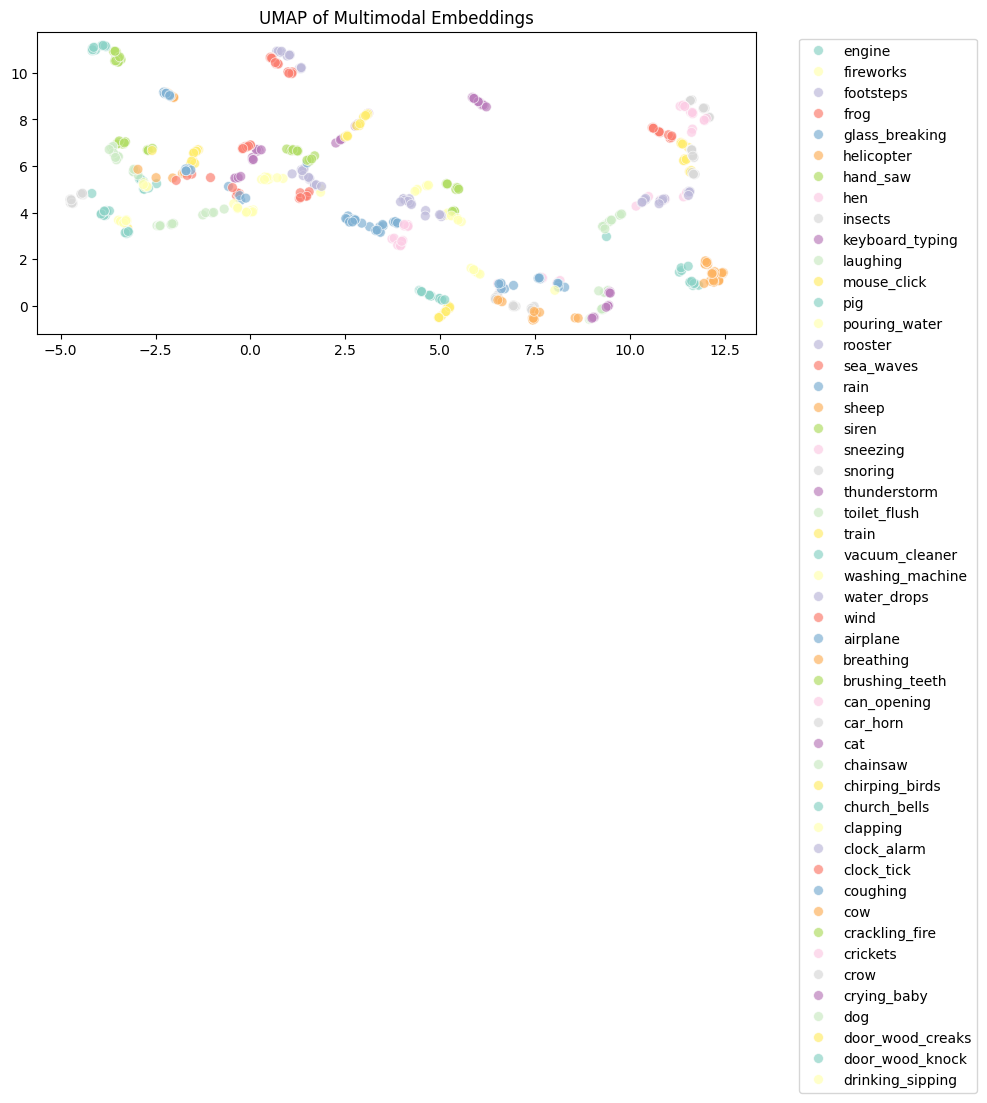

In [39]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = umap_model.fit_transform(all_embeddings)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
palette = sns.color_palette("Set3", len(set(labels)))
sns.scatterplot(x=embeddings_2d[:, 0], y=embeddings_2d[:, 1], hue=labels, palette=palette, s=50, alpha=0.7)
plt.title("UMAP of Multimodal Embeddings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


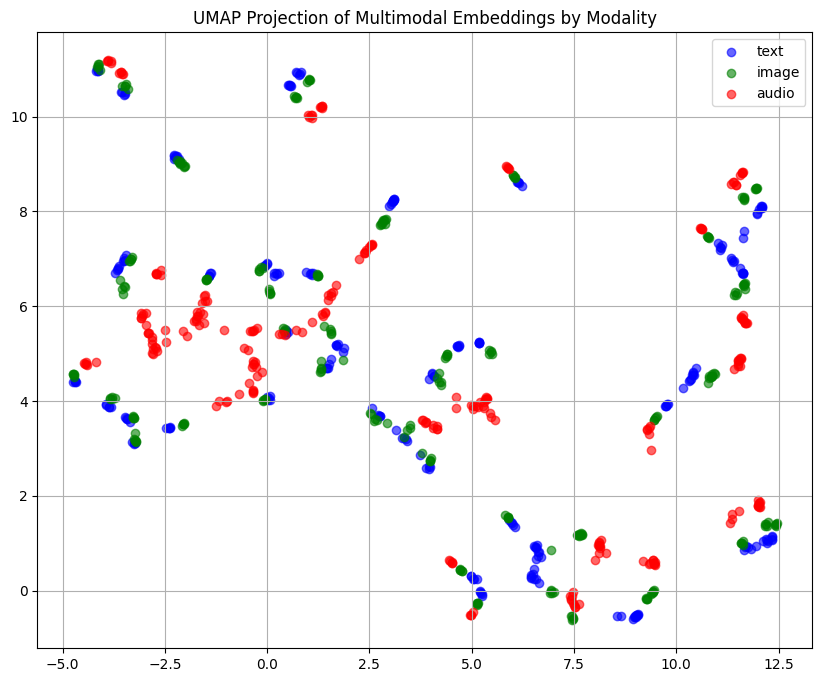

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

embeddings = np.array(all_embeddings)
labels = [meta["type"] for meta in all_metadata]


reducer = umap.UMAP(n_components=2, random_state=42)
reduced = reducer.fit_transform(embeddings)
colors = {"text": "blue", "image": "green", "audio": "red"}
plt.figure(figsize=(10, 8))
for modality in ["text", "image", "audio"]:
    idxs = [i for i, l in enumerate(labels) if l == modality]
    plt.scatter(reduced[idxs, 0], reduced[idxs, 1], label=modality, color=colors[modality], alpha=0.6)

plt.title("UMAP Projection of Multimodal Embeddings by Modality")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
query = "vehicle"
retrieved_items = retriever(query, k=100)
print("\n ============ Retrieval Results ============")
# pprint(retrieved_items)  commented because it gets toooo lengthy


 ============ Retrieval Results ============


In [56]:
type(retrieved_items)
modality_count = {
    "audio": 0,
    "image": 0,
    "text": 0
}
for i in retrieved_items:
    modality_count[i["type"]] += 1

In [57]:
modality_count

{'audio': 12, 'image': 20, 'text': 68}

### Conclusions

- The model successfully embeds all three modalities (text, image, and audio) into a shared latent space.

- When retrieving with k = 15, the top results are almost always of the text modality.

- When increasing k = 100, we begin to see retrievals from other modalities such as images and audio.

- This indicates that the model is at least partially aligning the modalities in the shared embedding space.

- The dominance of text results suggests that text embeddings (BERT) may be stronger or more discriminative than those from CLIP (image) or CLAP (audio).

- Alternatively, the training loss might still be favoring the text modality, possibly due to more stable gradients or easier learning dynamics for text-based contrastive pairs.

- Further tuning, such as balancing the loss contributions, adjusting projection layers, or using separate logit scales may help improve cross-modal alignment.